## Árbol de decisión para especies de flores

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("../datasets/iris/iris.csv")
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.shape

(150, 5)

In [4]:
import matplotlib.pyplot as plt

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

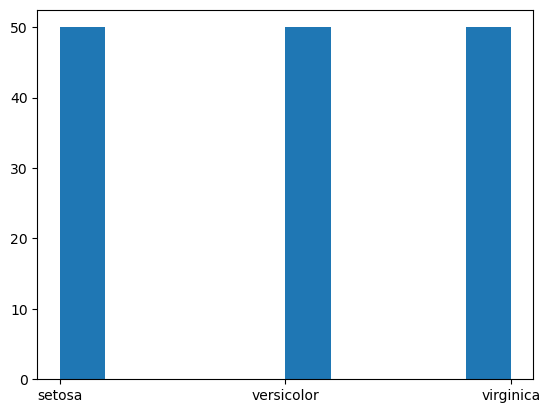

In [5]:
plt.hist(data.Species)

In [6]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
colnames = data.columns.values.tolist()
colnames

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

In [9]:
predictors = colnames[:4]
target = colnames[4]

In [10]:
import numpy as np

In [11]:
data["is_train"] = np.random.uniform(0,1,len(data)) <=0.75 

In [12]:
data.head(20)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True
5,5.4,3.9,1.7,0.4,setosa,True
6,4.6,3.4,1.4,0.3,setosa,True
7,5.0,3.4,1.5,0.2,setosa,False
8,4.4,2.9,1.4,0.2,setosa,True
9,4.9,3.1,1.5,0.1,setosa,False


In [23]:
list(map( int, data["is_train"]))

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1]

(array([ 37.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 113.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

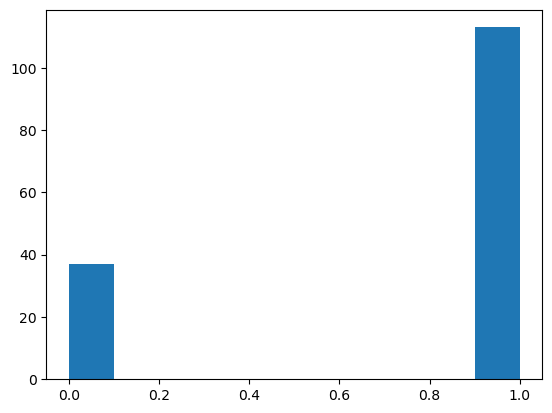

In [24]:
plt.hist(list(map( int, data["is_train"])))

In [25]:
train, test = data[ data["is_train"] == True] , data[ data["is_train"] == False]

In [27]:
(len(train), len(test))

(113, 37)

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=99)

In [31]:
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(criterion='entropy', min_samples_split=20,
                       random_state=99)

In [32]:
preds = tree.predict(test[predictors])
preds

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'versicolor', 'virginica', 'virginica', 'virginica', 'versicolor',
       'virginica', 'virginica'], dtype=object)

In [33]:
pd.crosstab(test[target], preds, rownames=["Actual"], colnames = ["Predictions"])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,10,0,0
versicolor,0,8,3
virginica,0,2,14


## Visualización del árbol de decisión

In [37]:
from sklearn.tree import export_graphviz

In [38]:
with open("resources/iris_dtree_Fidel.dot", "w") as dotfile:
    export_graphviz(tree, out_file = dotfile, feature_names = predictors)
    dotfile.close()

In [39]:
import os
from graphviz import Source

In [40]:
file = open("resources/iris_dtree_Fidel.dot","r")
text = file.read()
text

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="Petal.Length <= 2.45\\nentropy = 1.581\\nsamples = 113\\nvalue = [40, 39, 34]"] ;\n1 [label="entropy = 0.0\\nsamples = 40\\nvalue = [40, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Petal.Length <= 4.85\\nentropy = 0.997\\nsamples = 73\\nvalue = [0, 39, 34]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="Sepal.Length <= 4.95\\nentropy = 0.176\\nsamples = 38\\nvalue = [0, 37, 1]"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 1\\nvalue = [0, 0, 1]"] ;\n3 -> 4 ;\n5 [label="entropy = 0.0\\nsamples = 37\\nvalue = [0, 37, 0]"] ;\n3 -> 5 ;\n6 [label="Petal.Width <= 1.75\\nentropy = 0.316\\nsamples = 35\\nvalue = [0, 2, 33]"] ;\n2 -> 6 ;\n7 [label="entropy = 0.971\\nsamples = 5\\nvalue = [0, 2, 3]"] ;\n6 -> 7 ;\n8 [label="entropy = 0.0\\nsamples = 30\\nvalue = [0, 0, 30]"] ;\n6 -> 8 ;\n}'

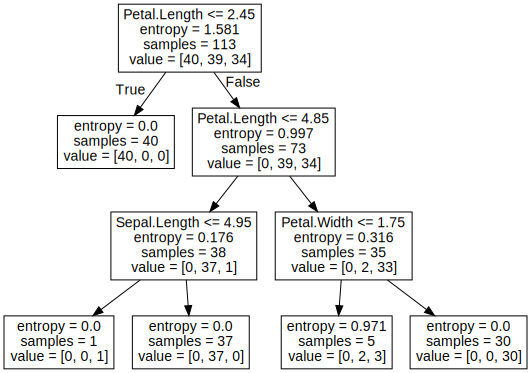

In [41]:
Source(text)

### Entre menor es la entropía es mejor la clasificación

### orden: setosa	versicolor	virginica

### longitud del árbol = 3

## Cross Validation para la poda de un árbol de decisión

In [42]:
X = data[predictors]
Y = data[target]

In [43]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=20, random_state=99)
tree.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20,
                       random_state=99)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
from sklearn.model_selection import KFold

In [53]:
cv = KFold(n_splits=10,shuffle=True, random_state=1)

In [54]:
cv

KFold(n_splits=10, random_state=1, shuffle=True)

In [55]:
from sklearn.model_selection import cross_val_score

In [61]:
scores = cross_val_score(tree, X,Y,scoring="accuracy", cv = cv, n_jobs=1)
scores

array([1.        , 0.93333333, 0.93333333, 0.93333333, 1.        ,
       0.93333333, 1.        , 0.86666667, 0.93333333, 0.8       ])

In [62]:
score = np.mean(scores)

In [63]:
score

0.9333333333333333

### validación cruzada de 10 grupos

In [66]:
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(X,Y)
    cv = KFold(n_splits=10,shuffle=True, random_state=1)
    scores = cross_val_score(tree, X,Y,scoring="accuracy", cv = cv, n_jobs=1)
    score = np.mean(scores)
    print("Score para %i = "%i, " ", score)
    print("     ", tree.feature_importances_)

Score para 1 =    0.5666666666666667
      [0. 0. 1. 0.]
Score para 2 =    0.9200000000000002
      [0.         0.         0.66620285 0.33379715]
Score para 3 =    0.9400000000000001
      [0.         0.         0.68976981 0.31023019]
Score para 4 =    0.9333333333333333
      [0.         0.         0.66869158 0.33130842]
Score para 5 =    0.9333333333333333
      [0.         0.         0.66869158 0.33130842]
Score para 6 =    0.9333333333333333
      [0.         0.         0.66869158 0.33130842]
Score para 7 =    0.9333333333333333
      [0.         0.         0.66869158 0.33130842]
Score para 8 =    0.9333333333333333
      [0.         0.         0.66869158 0.33130842]
Score para 9 =    0.9333333333333333
      [0.         0.         0.66869158 0.33130842]
Score para 10 =    0.9333333333333333
      [0.         0.         0.66869158 0.33130842]


In [67]:
predictors

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

### es la importancia de los predictores 

## Árboles de Regresión

chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www2.stat.duke.edu/~rcs46/lectures_2017/08-trees/08-tree-regression.pdf

In [68]:
import pandas as pd

In [69]:
data = pd.read_csv("../datasets/boston/Boston.csv")
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset

In [70]:
data.shape

(506, 14)

In [71]:
colnames = data.columns.values.tolist()
predictors = colnames[:13]
target = colnames[13]
X=data[predictors]
Y = data[target]

In [72]:
from sklearn.tree import DecisionTreeRegressor

In [73]:
regtree = DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=10, random_state=0)

In [74]:
regtree.fit(X,Y)

DecisionTreeRegressor(min_samples_leaf=10, min_samples_split=30, random_state=0)

In [75]:
preds = regtree.predict(data[predictors])

In [76]:
data["preds"] = preds

In [77]:
data[["preds", "medv"]]

,preds,medv
0,22.840000,24.0
1,22.840000,21.6
2,35.247826,34.7
3,35.247826,33.4
4,35.247826,36.2
...,...,...
501,22.840000,22.4
502,20.624138,20.6
503,28.978261,23.9
504,31.170000,22.0


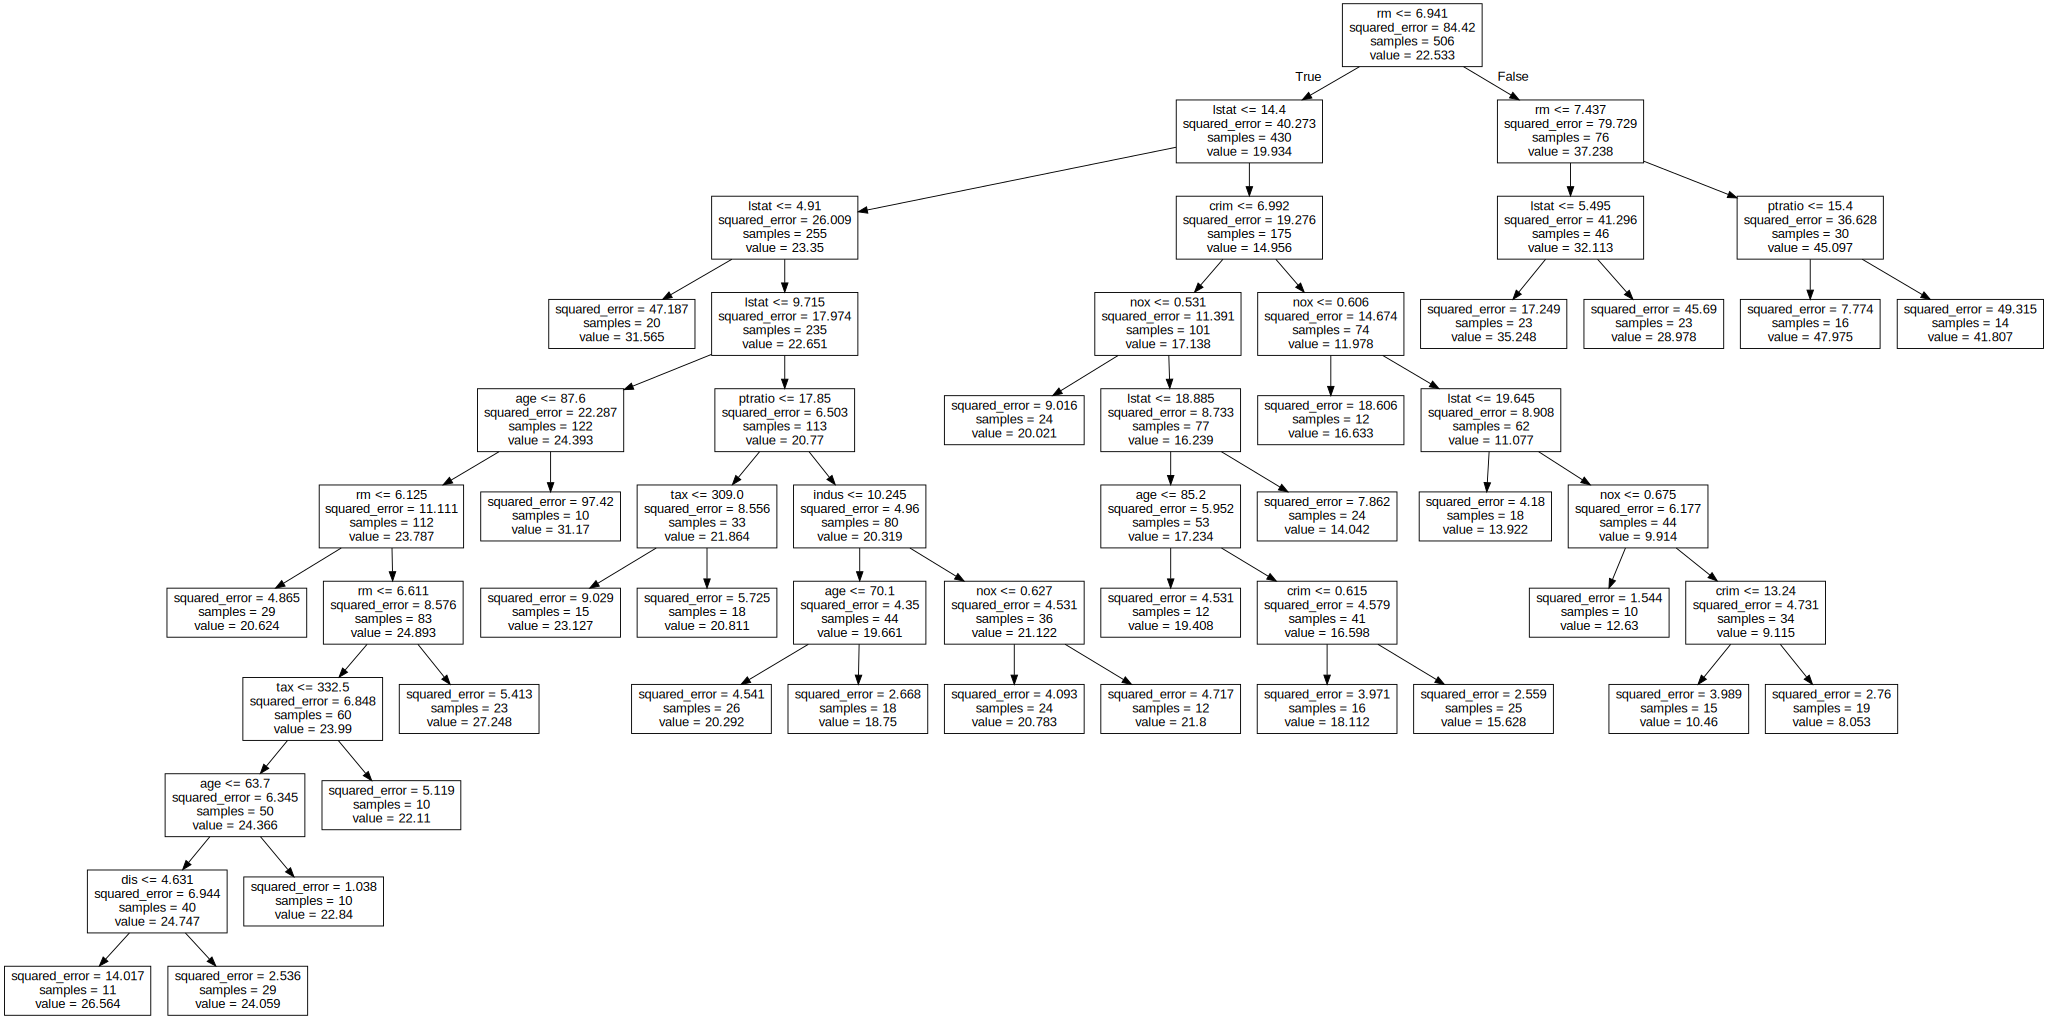

In [78]:
from sklearn.tree import export_graphviz
with open("resources/boston_rtree_Fidel.dot", "w") as dotfile:
    export_graphviz(regtree, out_file = dotfile, feature_names = predictors)
    dotfile.close()

import os
from graphviz import Source

file = open("resources/boston_rtree_Fidel.dot","r")
text = file.read()
text
Source(text)


In [92]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10,shuffle=True, random_state=1)
cv

KFold(n_splits=10, random_state=1, shuffle=True)

In [93]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import get_scorer_names

In [94]:
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [95]:
scores = cross_val_score(regtree, X,Y,scoring="r2", cv = cv, n_jobs=1)

In [96]:
scores

array([0.85293137, 0.83493537, 0.7726901 , 0.45227168, 0.88318504,
       0.73121579, 0.75464413, 0.67031453, 0.79895153, 0.83052528])

In [97]:
score = np.mean(scores)
score

0.7581664833903177

In [98]:

scores = cross_val_score(regtree, X,Y,scoring="neg_mean_squared_error", cv = cv, n_jobs=1)
scores

array([-13.64925886, -17.28987161, -16.98569707, -47.56954086,
        -9.26202865, -17.23057023, -15.41541493, -31.33011027,
       -22.79877067,  -9.54180723])

In [99]:
score = np.mean(scores)
score

-20.107307036443846

In [100]:
regtree.feature_importances_

array([0.03421203, 0.        , 0.00116059, 0.        , 0.01856163,
       0.6308568 , 0.01725115, 0.00137451, 0.        , 0.00236983,
       0.00933325, 0.        , 0.28488021])

In [102]:
list(zip(predictors,regtree.feature_importances_))

[('crim', 0.03421203230639308),
 ('zn', 0.0),
 ('indus', 0.0011605887788380146),
 ('chas', 0.0),
 ('nox', 0.01856163073811432),
 ('rm', 0.6308568014337028),
 ('age', 0.01725115143448847),
 ('dis', 0.0013745115995791378),
 ('rad', 0.0),
 ('tax', 0.0023698305298803803),
 ('ptratio', 0.009333247332530954),
 ('black', 0.0),
 ('lstat', 0.28488020584647283)]

### la variables más influyente es rm, luego lstat, luego crim

In [103]:
regtree = DecisionTreeRegressor(min_samples_split=30, max_depth=5, min_samples_leaf=10, random_state=0)

In [104]:
regtree.fit(X,Y)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, min_samples_split=30,
                      random_state=0)

In [105]:
preds = regtree.predict(data[predictors])

In [106]:
data["preds"] = preds

In [107]:
data[["preds", "medv"]]

,preds,medv
0,23.787500,24.0
1,23.787500,21.6
2,35.247826,34.7
3,35.247826,33.4
4,35.247826,36.2
...,...,...
501,23.787500,22.4
502,23.787500,20.6
503,28.978261,23.9
504,31.170000,22.0


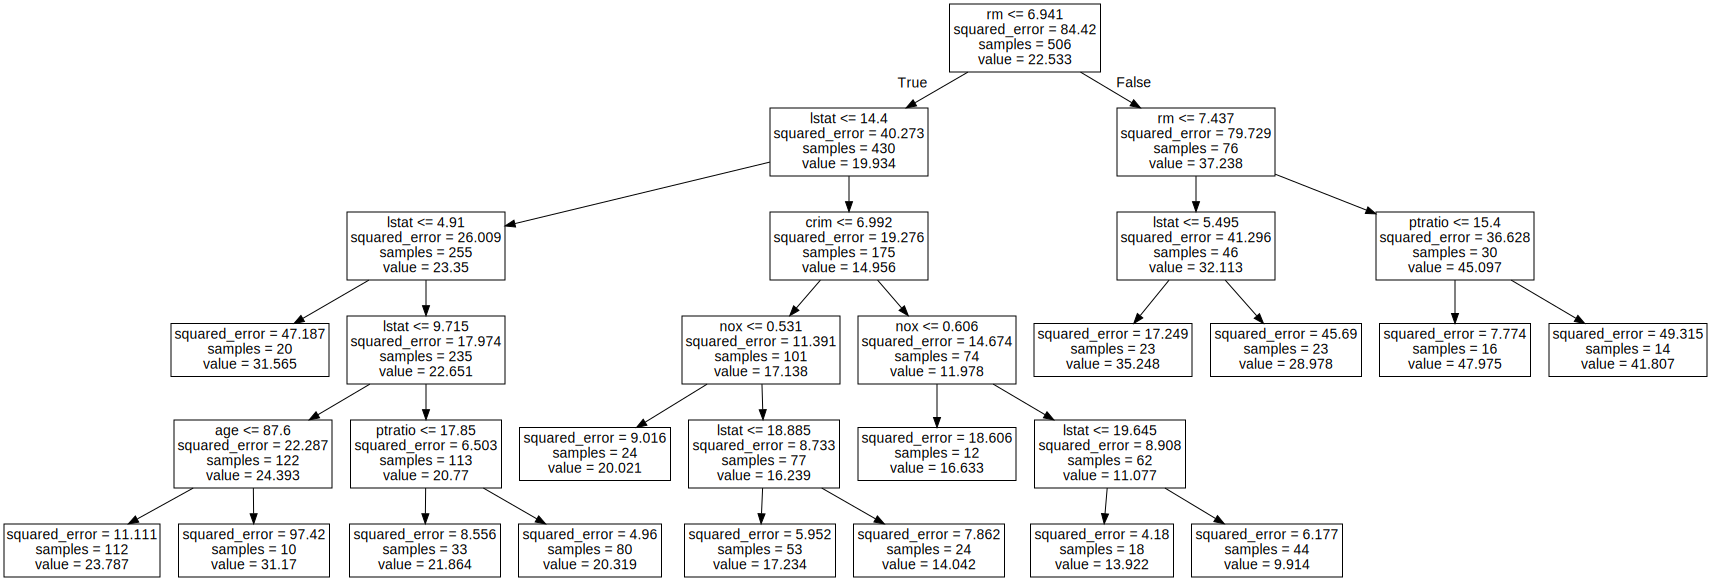

In [108]:
from sklearn.tree import export_graphviz
with open("resources/boston_rtree_Fidel.dot", "w") as dotfile:
    export_graphviz(regtree, out_file = dotfile, feature_names = predictors)
    dotfile.close()

import os
from graphviz import Source

file = open("resources/boston_rtree_Fidel.dot","r")
text = file.read()
text
Source(text)

In [109]:
scores = cross_val_score(regtree, X,Y,scoring="neg_mean_squared_error", cv = cv, n_jobs=1)
scores

array([-14.21501779, -16.62018743, -18.48312343, -46.22608214,
       -10.25202434, -18.39546877, -15.08005674, -32.23929702,
       -23.04375075, -10.93761052])

In [110]:
score = np.mean(scores)
score

-20.54926189262014

## Random Forest

In [144]:
from sklearn.ensemble import RandomForestRegressor

In [145]:
forest = RandomForestRegressor(n_jobs=2, oob_score= True, n_estimators=2000)

In [146]:
forest.fit(X,Y)

RandomForestRegressor(n_estimators=2000, n_jobs=2, oob_score=True)

### n_jobs es tareas en paralelo en el computador, oob_score hace muestreo aleatorio , n_estimadores en el número de árboles

In [147]:
forest.oob_prediction_

array([28.70435931, 22.65617368, 34.7434663 , 34.92552356, 34.27783858,
       24.06034946, 20.25032765, 17.37001339, 18.0430727 , 19.60039578,
       20.98547009, 20.82406417, 21.30318119, 19.91092896, 20.00507545,
       20.32486339, 21.31870027, 18.3148405 , 18.64848485, 19.80585106,
       14.57002762, 18.69395161, 16.0071618 , 15.03658537, 16.48598131,
       15.78285322, 17.35949198, 15.15234375, 19.97956104, 23.02691771,
       14.56118143, 19.80291391, 16.4386014 , 14.57738095, 14.35220049,
       21.0696793 , 20.95563094, 20.98777174, 20.99138627, 28.15418919,
       33.78614719, 30.65      , 24.46379974, 24.53614776, 22.1512    ,
       19.74951049, 20.12148649, 19.50849673, 18.64631433, 19.41928865,
       20.73320158, 22.14271845, 25.46537931, 20.6751763 , 19.35868102,
       33.97918367, 22.86606648, 30.88927577, 22.88110795, 20.57858136,
       18.89367263, 19.2110957 , 24.10326087, 25.76031746, 32.52810881,
       24.56055409, 20.25377229, 20.63152318, 19.31481481, 21.05

In [148]:
data["rforest_pred"] = forest.oob_prediction_

In [149]:
data.head(100)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,preds,rforest_pred,rforest_error2
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,23.787500,28.704359,19.758383
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,23.787500,22.656174,1.152197
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,35.247826,34.743466,0.003754
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,35.247826,34.925524,3.158914
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,35.247826,34.277839,3.309639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.12204,0.0,2.89,0,0.445,6.625,57.8,3.4952,2,276,18.0,357.98,6.65,28.4,23.787500,27.094631,1.991812
96,0.11504,0.0,2.89,0,0.445,6.163,69.6,3.4952,2,276,18.0,391.83,11.34,21.4,20.318750,22.325793,1.845003
97,0.12083,0.0,2.89,0,0.445,8.069,76.0,3.4952,2,276,18.0,396.90,4.21,38.7,41.807143,44.579842,28.741672
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8,41.807143,42.771717,0.908811


In [150]:
data[["medv", "rforest_pred"]]

,medv,rforest_pred
0,24.0,28.704359
1,21.6,22.656174
2,34.7,34.743466
3,33.4,34.925524
4,36.2,34.277839
...,...,...
501,22.4,24.636885
502,20.6,19.039365
503,23.9,27.682777
504,22.0,26.262280


In [151]:
data["rforest_error2"] =(data["rforest_pred"]-data["medv"])**2

In [152]:
sum(data["rforest_error2"] )/len(data)

10.129097085001534

In [153]:
forest.oob_score_

0.8800148028939647

## Clasificación con Random Forest

In [154]:
from sklearn.ensemble import RandomForestClassifier

In [161]:
data = pd.read_csv("../datasets/iris/iris.csv")
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [162]:
colnames = data.columns.values.tolist()
colnames

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

In [163]:
predictors = colnames[:4]
target = colnames[4]

In [164]:
X = data[predictors]
Y = data[target]

In [165]:
X

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [166]:
Y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object

In [167]:
forest = RandomForestClassifier(n_jobs=2, oob_score= True, n_estimators=100)

In [168]:
forest.fit(X,Y)

RandomForestClassifier(n_jobs=2, oob_score=True)

In [170]:
forest.oob_decision_function_

array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.97826087, 0.02173913, 0.        ],
       [0.975     , 0.025     , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.96875   , 0.03125   , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.

### Con qué probabilidad cae cada uno en setosa	versicolor	virginica

In [173]:
forest.oob_score_ #Precisión

0.9466666666666667